## Table of Contents

1. [Introduction](#introduction)

2. [Importing Modules](#importing-modules)

3. [Read Data from CSV](#read-data)

4. [Successful and Unsuccessful Loans](#success-unsuccess-loans)

4. [Correlation Matrix](#correlation-matrix)

5. [Amount and Duration of Loans](#amount-duration-loans)

6. [Payments and Amount of Loans](#payments-amount-loan)

7. [Amount of Loan and Last Balance on Account](#amount-last-balance)

8. [Inter-Quartile Balance per Account and Last account Balance Relation](#inter-quartile-balance)

10. [Loan Amount Statistics](#loan-amount)

11. [Transactions Statistics](#transactions-statistics)

12. [Histograms Observations](#histograms-observations)

## Introduction <a class="anchor" id="introduction"></a>

In this notebook, we present the Data Exploration phase. We show some plots that can help explain how the data we are dealing with is distributed and their characteristics. 

## Importing Modules <a class="anchor" id="importing-modules"></a>

In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Read Data from CSV <a class="anchor" id="read-data"></a>

In [56]:
df = pd.read_csv("./preprocessed/mergedTrainData.csv")

## Successful and Unsuccessful Loans <a class="anchor" id="success-unsuccess-loans"></a>

With the plot below we can see that our dataset is highly unbalanced. There are many more loans with success status than unsuccessful ones.  

[[<matplotlib.axis.XTick at 0x7fba72727370>,

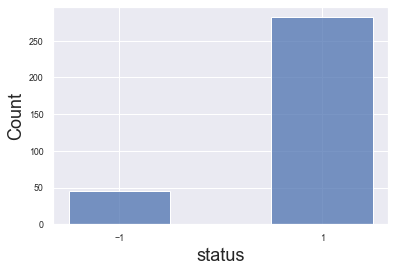

In [57]:
fig = sns.histplot(df, discrete=True, x="status")
fig.set(xticks=[-1,1])

## Correlation Matrix <a class="anchor" id="correlation-matrix"></a>

With the features we got for the `SelectKBest` method in the `dataProcessing` notebook, we created a correlation matrix in order to identify redundant attributes. The greater the correlation coefficient between a pair of attributes is, the more dependent those attributes are on each other. One of those attributes can be dropped since it can be derived from the other. 

<AxesSubplot:>

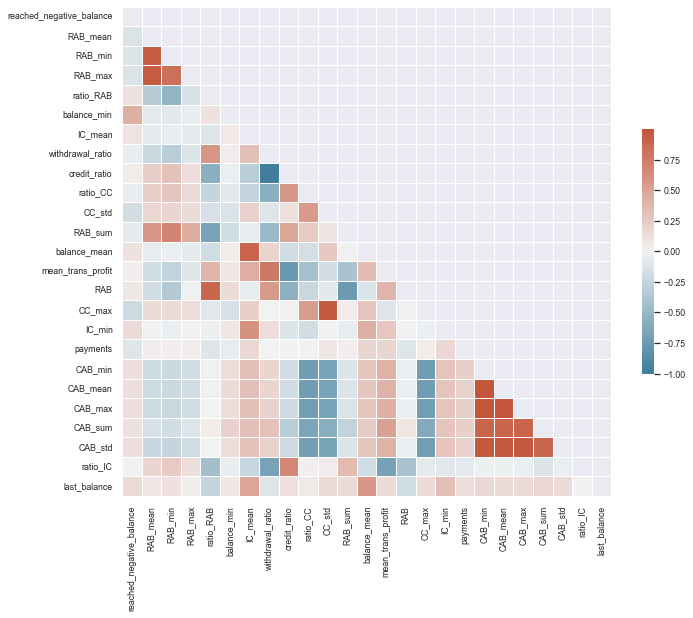

In [58]:
# Best features returned previously by the Feature Selection algorithm. 
best_features = ['reached_negative_balance', 'RAB_mean', 'RAB_min', 'RAB_max',
    'ratio_RAB', 'balance_min', 'IC_mean', 'withdrawal_ratio', 'credit_ratio',
    'ratio_CC', 'CC_std', 'RAB_sum', 'balance_mean', 'mean_trans_profit', 'RAB',
    'CC_max', 'IC_min', 'payments', 'CAB_min', 'CAB_mean', 'CAB_max', 'CAB_sum',
    'CAB_std', 'ratio_IC', 'last_balance']

corr = df[best_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Looking at the correlation matrix of the best features (according to our feature selection algorithm), we can see that the following columns have a high correlation:
- `RAB_mean` and `RAB_min` (we're going to remove the `RAB_min` column)
- `RAB_mean` and `RAB_max` (we're going to remove the `RAB_max` column)
- `ratio_RAB` and `RAB` (we're going to remove the `RAB`)
- `withdrawal_ration` and `credit_ratio` (we're going to remove the `withdrawal_ration`)
- `IC_mean` and `balance_mean` (we're going to remove the `IC_mean`)
- `RAB`_sum and `RAB` (we're going to remove the `RAB`, as we said previously)
- `CAB_min` and `ratio_CC` (we're going to remove the `CAB_min`)
- `CAB_min` and `CAB_max` (we're going to remove `CAB_min`, as we said previously)
- `CAB_max` and `CAB_sum` (we're going to remove `CAB_max`)
- `CAB_mean` and `CAB_sum` (we're going to remove `CAB_sum`)
- `CAB_mean` and `CAB_std` (we're going to remove `CAB_std`)

The features presented in the next output and are the ones that are going to be used in the models. We just made some changes according to our needs and added/removed some columns we think would be important for our models. 

In [59]:
features_to_remove = ['RAB_min', 'RAB_max', 'RAB', 'withdrawal_ratio', 'IC_mean', 'CAB_min', 'CAB_max', 'CAB_sum', 'CAB_std']
selected_features = list(filter(lambda x: x not in features_to_remove, best_features))
print(selected_features)

['reached_negative_balance', 'RAB_mean', 'ratio_RAB', 'balance_min', 'credit_ratio', 'ratio_CC', 'CC_std', 'RAB_sum', 'balance_mean', 'mean_trans_profit', 'CC_max', 'IC_min', 'payments', 'CAB_mean', 'ratio_IC', 'last_balance']


## Amount and Duration of Loans <a class="anchor" id="amount-duration-loans"></a>

From this plot, we can say that normally a high-duration loan means a high-amount loan. The opposite is also true, a low-duration loan typically means a low-amount loan. 

<AxesSubplot:xlabel='duration', ylabel='amount'>

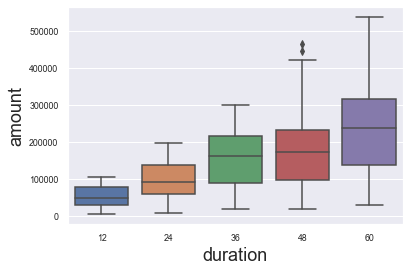

In [60]:
sns.boxplot(x="duration", y="amount", data=df)

## Payments and Amount of Loan <a class="anchor" id="payments-amount-loan"></a>
Looking at the following plot, it is visible the correlation between the payments and the amount of a loan. Normally the higher the amount of the loan, also higher the payments will be. This is true because the amount is equal to the payments times the duration.

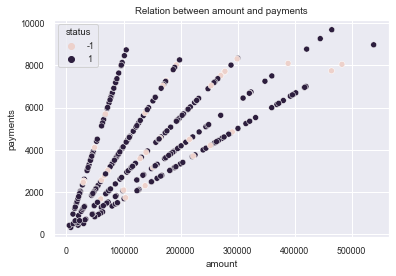

In [61]:
def scatterplot_graph(df, col1, col2, title, col_hue=None):
  if col_hue != None:
    sns.scatterplot(data=df, x=df[col1], y=df[col2], hue=col_hue).set_title(title)
  else:
    sns.scatterplot(data=df, x=df[col1], y=df[col2]).set_title(title)

loan_train_data = pd.read_csv("./files/loan_train.csv", sep=";")
sns.set(font_scale = 0.8)
scatterplot_graph(df=loan_train_data, col1="amount", col2="payments", title="Relation between amount and payments", col_hue="status")


## Amount of Loan and Last Balance on Account <a class="anchor" id="amount-last-balance"></a>

Clients with lower (last) balances on their accounts are more prone to ask for a loan and normally loans with a lower amount.

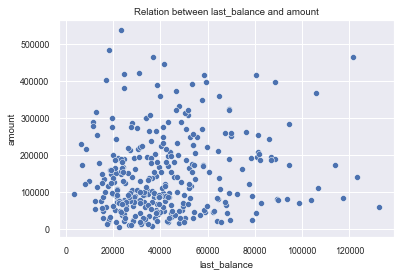

In [62]:
scatterplot_graph(df=df, col1="last_balance", col2="amount", title="Relation between last_balance and amount")

## Inter-Quartile Balance per Account and Last account Balance Relation <a class="anchor" id="inter-quartile-balance"></a>

In the next plot, we can see the relation between the inter-quartile balance of an account and the respective last balance for the same account.

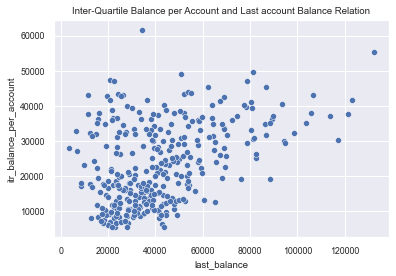

In [63]:
merged_data_train = pd.read_csv("./preprocessed/mergedTrainData.csv")
scatterplot_graph(df=merged_data_train, col1="last_balance", col2="itr_balance_per_account", title="Inter-Quartile Balance per Account and Last account Balance Relation")

## Loan Amount Statistics <a class="anchor" id="loan-amount"></a>

We now look into some statistics and observations about the loan amounts.

### Loan Train Data

We start by computing the mean and standard deviation and other statistics measures for the loan's amount for years 1993 to 1996 for the train data.

In [64]:
loan_train_data = pd.read_csv("./preprocessed/loan_train_data.csv", index_col=0)

amount_means = []
amount_stds = []

loan_years = [12, 11, 10, 9]
print("----- Loan Train Data -----")
for year in loan_years:
  loan_data_year = loan_train_data[['amount']].loc[loan_train_data['years_since_loan'] == year]
  print("Statistics for year: " + str(2006 - year - 1))
  amount_means.append(loan_data_year.describe()['amount']['mean'])
  amount_stds.append(loan_data_year.describe()['amount']['std'])
  print(loan_data_year.describe()['amount'][['mean', 'std']])
  print("\n")

----- Loan Train Data -----
Statistics for year: 1993
mean    130963.800000
std     102616.372786
Name: amount, dtype: float64


Statistics for year: 1994
mean    132474.297030
std      92176.867372
Name: amount, dtype: float64


Statistics for year: 1995
mean    148580.739130
std     111595.155798
Name: amount, dtype: float64


Statistics for year: 1996
mean    156457.565217
std     110942.944512
Name: amount, dtype: float64




### Loan Test Data

We also compute the mean and standard deviation for the loan's amount for years 1997 to 1998 for the test data.

In [65]:
loan_test_data = pd.read_csv("./preprocessed/loan_test_data.csv", index_col=0)
loan_years = [8, 7]

print("----- Loan Test Data -----")
for year in loan_years:
  loan_data_year = loan_test_data[['years_since_loan', 'amount']].loc[loan_test_data['years_since_loan'] == year]
  print("Statistics for year: " + str(2006 - year - 1))

  calculated_mean = loan_data_year.describe()['amount']['mean']
  calculated_std = loan_data_year.describe()['amount']['std']
  amount_means.append(calculated_mean)
  amount_stds.append(loan_data_year.describe()['amount']['std'])

  print(loan_data_year.describe()['amount'][['mean', 'std']])
  print("\n")

----- Loan Test Data -----
Statistics for year: 1997
mean    156792.673469
std     125004.743042
Name: amount, dtype: float64


Statistics for year: 1998
mean    157399.670886
std     114554.158701
Name: amount, dtype: float64




### Insights about the Loan Amounts

Through the gathering of statistics about loans, namely the mean, standard deviation, minimum and maximum amounts of loans for every year in the train and test datasets we conclude there was a huge variation in the standard deviation of amounts between 1993, 1994, 1995, and 1996 in the train dataset. These loan amounts were getting more spread out through the years in an irregular way, according to the Standard Deviation plot two cells below. After 1996 the loan amounts were still increasing but with a lower slope. 

It's also important to note that through the years the average loan amount was growing when observing the train a test datasets independently. This clearly demonstrates that people were asking more and more for loans.

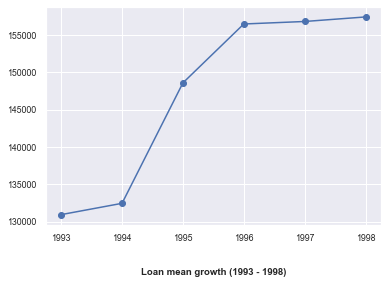

In [66]:
# Train data - Growing mean (1993 - 1998)
train_years = ["1993", "1994", "1995", "1996", "1997", "1998"]
plt.scatter(train_years, amount_means)
plt.plot(train_years, amount_means)
plt.xlabel("\n\nLoan mean growth (1993 - 1998)", fontdict={"weight": "bold"})
plt.show()

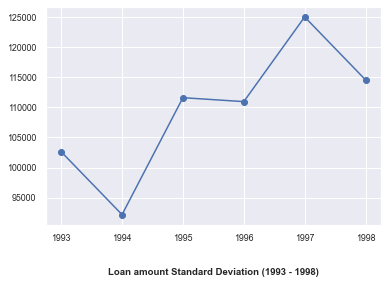

In [67]:
# Train data - Standar Deviation (1993 - 1998)
train_years = ["1993", "1994", "1995", "1996", "1997", "1998"]
plt.scatter(train_years, amount_stds)
plt.plot(train_years, amount_stds)
plt.xlabel("\n\nLoan amount Standard Deviation (1993 - 1998)", fontdict={"weight": "bold"})
plt.show()

## Transactions Statistics <a class="anchor" id="transactions-statistics"></a>

We now look into some statistics about the Transactions data.

In [68]:
def trans_stats(df):
  credit_df = df.loc[df["type"] == "credit"]['amount']
  withdrawal_df = df.loc[df["type"] == "withdrawal"]['amount']

  credit_count = credit_df.describe()['count']
  credit_mean = credit_df.describe()['mean']

  withdrawal_count = withdrawal_df.describe()['count']
  withdrawal_mean = withdrawal_df.describe()['mean']

  return [credit_count, credit_mean, withdrawal_count, withdrawal_mean]

In [69]:
trans_train_data = pd.read_csv("./files/trans_train.csv", sep=";")
[credit_count, credit_mean, withdrawal_count, withdrawal_mean] = trans_stats(trans_train_data)

/home/dukes/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Credit and Withdrawal Transactions Count

With the next plot we can see that there were less Credit transactions (money entering in the account) compared to Withdrawal ones (money exiting the account) almost in a 1:2 relation.

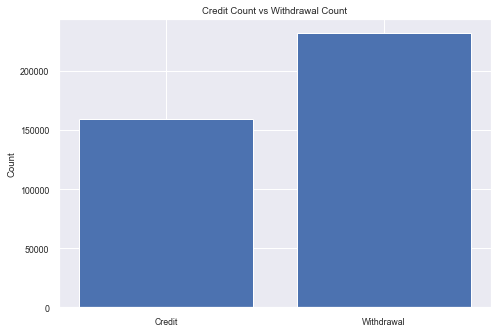

In [70]:
algorithms = ("Credit", "Withdrawal")

values = [credit_count, withdrawal_count]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algorithms, values)
plt.title("Credit Count vs Withdrawal Count")
plt.ylabel("Count")
plt.show()

### Credit and Withdrawal Transactions amount Mean

But with this plot we can see that the mean of the credit amounts is higher than the mean of the withdrawal amounts almost in a 2:1 relation.

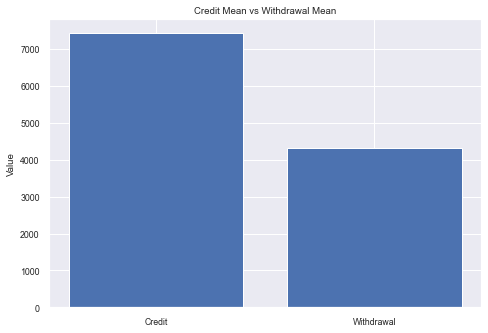

In [71]:
algorithms = ("Credit", "Withdrawal")

values = [credit_mean, withdrawal_mean]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algorithms, values)
plt.title("Credit Mean vs Withdrawal Mean")
plt.ylabel("Value")
plt.show()

With this observations, we can attest some reliability on the Transactions data. 

Even though the number of withdrawals is higher than the number of credits, the amount of those withdrawals was smaller than the amount of the credit. If the second observation was not true, it would mean that the clients were going bankrupt.

## Histograms Observations <a class="anchor" id="histograms-observations"></a>

On the next image, we can observe many histograms representing the count of many features and it's relation with the loan status. We can see this for:
- Account balance mean.
- Last balance on account.
- Loan's amount.
- Entrepreneurs ratio.
- Gender.
- Criminality growth. 

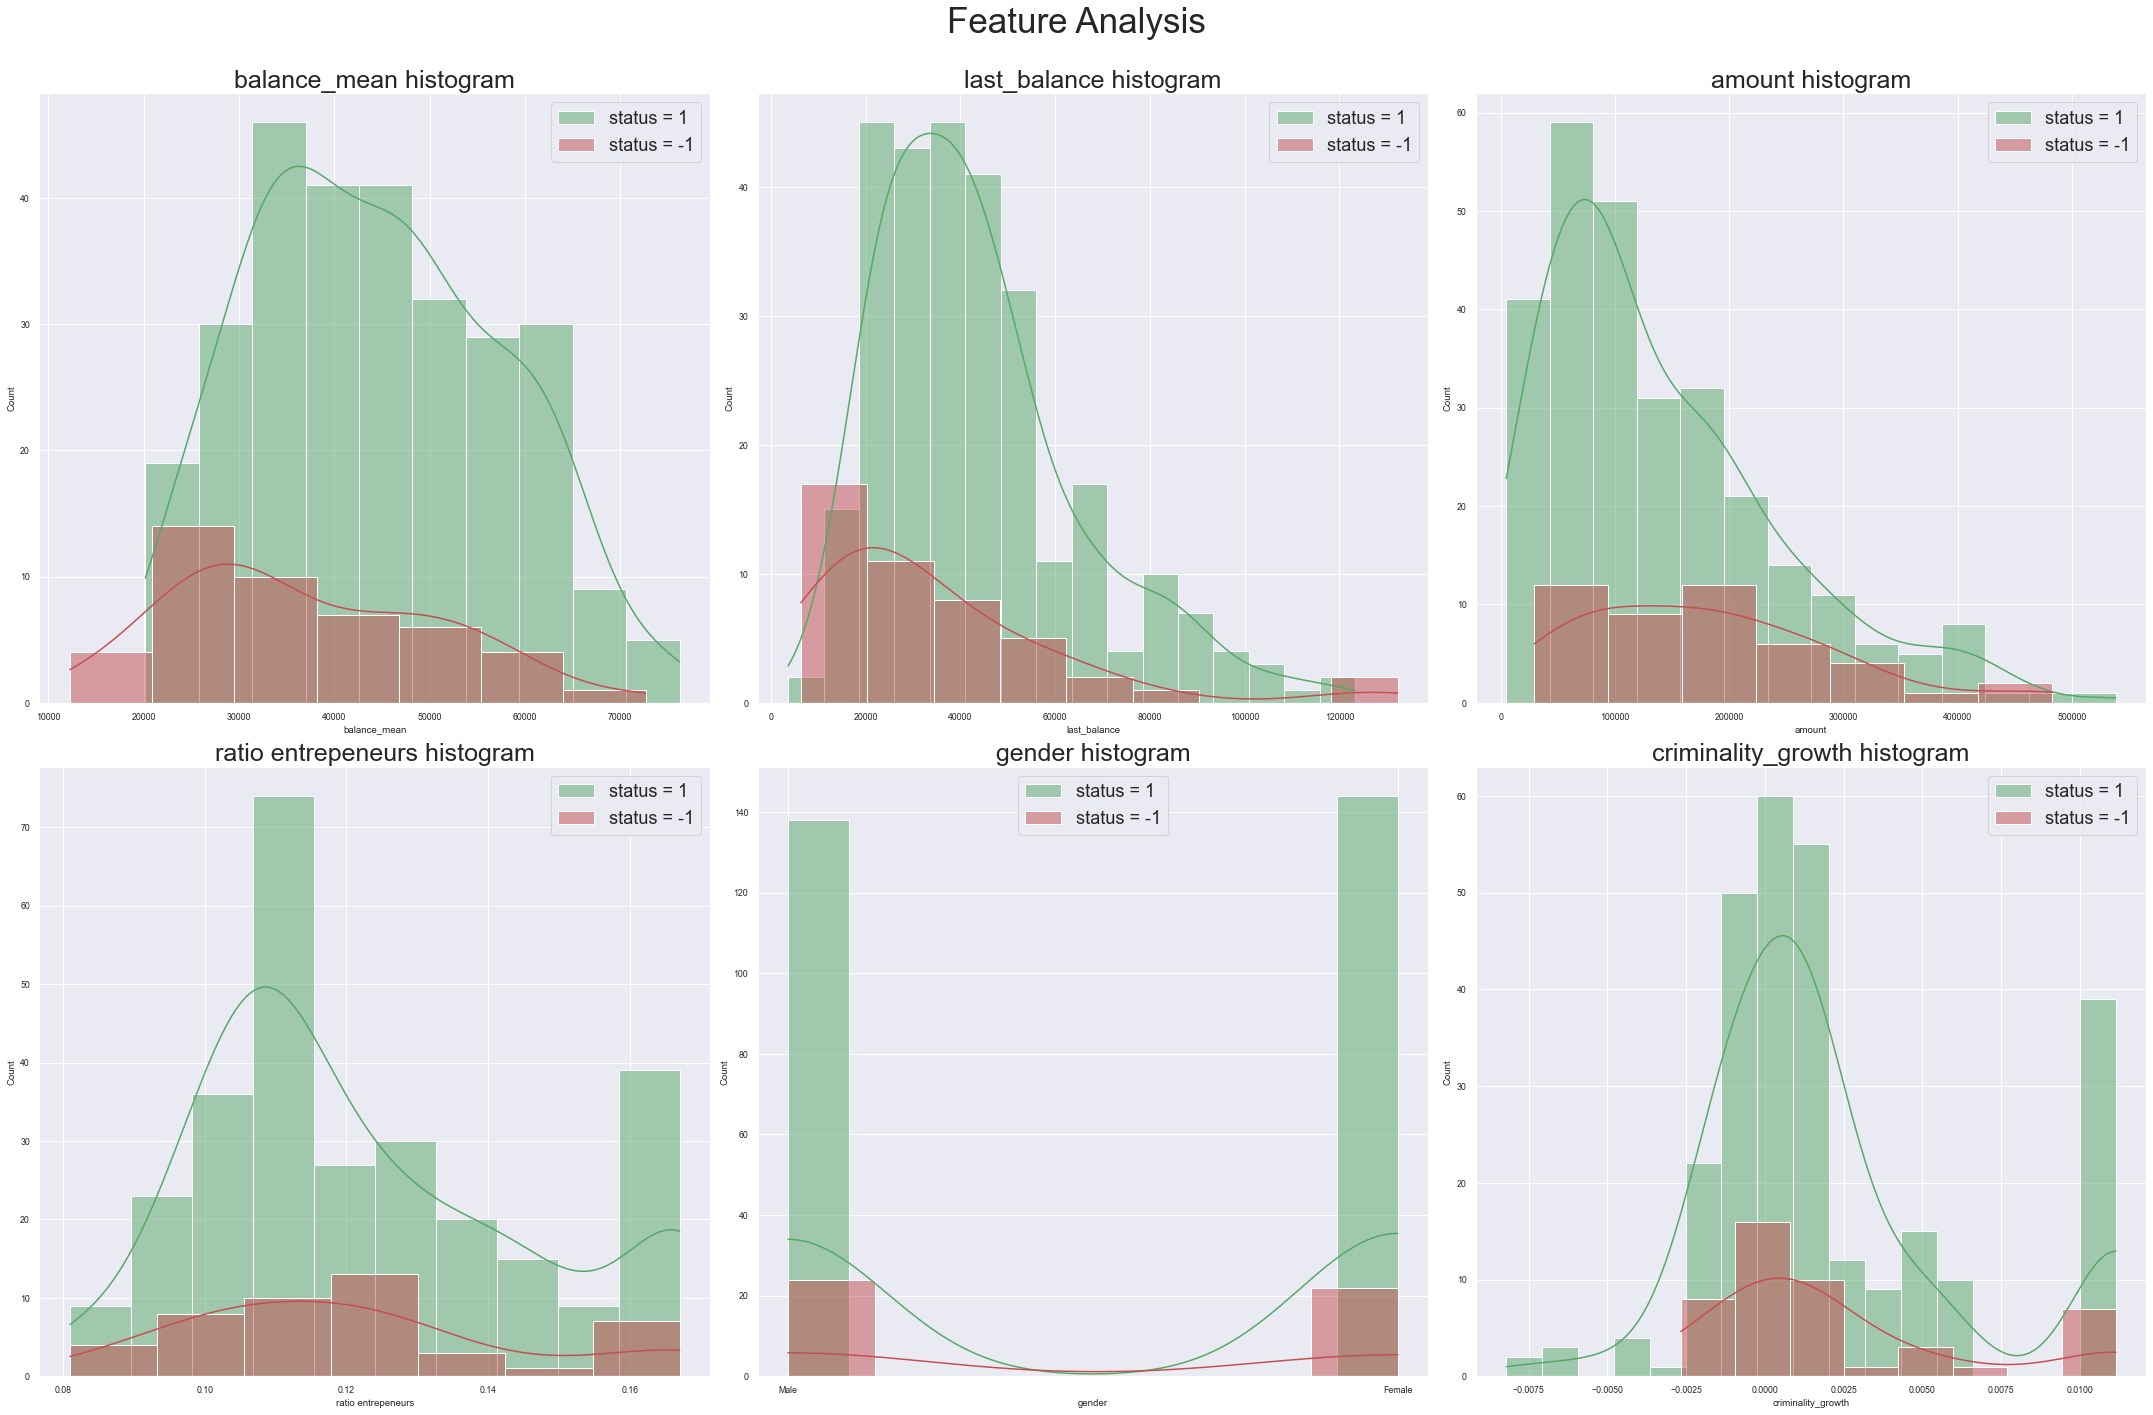

In [72]:

def get_feature_histogram(df, column, ax):
    loan = df[df.status==1]
    do_not_loan = df[df.status==-1]

    sns.histplot(loan[column], ax=ax, color='g', label = 'status = 1', kde=True)
    fig = sns.histplot(do_not_loan[column], ax=ax, color='r', label = 'status = -1', kde=True)

    if column == "gender":
        fig.set(xticks=[0, 1], xticklabels=["Male", "Female"])


# needs to have a len that is a perfect square
features_to_analyse = ["balance_mean", "last_balance", "amount", "ratio entrepeneurs", "gender", "criminality_growth"]

def get_features_histograms(df, columns, num_cols, num_rows):
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 20))
    column_index = 0

    for i in range(num_rows):
        for j in range(num_cols):
            get_feature_histogram(ax=axs[i, j], df=df, column=columns[column_index])
            axs[i, j].set_title(f"{columns[column_index]} histogram", fontsize=25)
            axs[i, j].legend(loc="best", fontsize=18)
            plt.rc('axes', labelsize=18)
            column_index += 1
    
    fig.suptitle('Feature Analysis', fontsize=35)
    fig.tight_layout()
    fig.subplots_adjust(top=0.92)
    plt.show()

merged_data_train = pd.read_csv("./preprocessed/mergedTrainData.csv")
get_features_histograms(df=merged_data_train, columns=features_to_analyse, num_cols=3, num_rows=2)


From these plots we can observe some interesting conclusions:
- Clients with lower account's balances are more prone to ask for loans.
- There are more loans with lower asked amounts.
-  The criminality growth in a district and the gender have no influence on the success of the loan.